#### The aim of my final project is to use a ML or DL algorithm able to predict insurance charges for a person.

#### The first step is to import the dataset and do the preprocessing.

#1. Import dataset.

In [2]:
import pandas as pd

data=pd.read_csv('insurance.csv')
print('DATASET:\n')
data.head()


DATASET:



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Statistical description of the dataset:\n')
data.describe()

Statistical description of the dataset:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#2. Data Preprocessing.

##Transform the categorical data.




I need to transform the sex, children, smoker and region features into categorical ones. I know I can use the preprocessing tool from Scikit Learn to encode labels. I prefer to do it mannually to control the control de values of each class because later I want to differenciate them for the color of  plots.

 1. Female = 0 / Male = 1

In [4]:
data['sex'][data['sex'] == 'female'] = 0.0
data['sex'][data['sex'] == 'male'] = 1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2. Southwest = 0 / Southeast = 1 / Northwest = 2 / Northeast = 3


In [5]:
regions = set(data['region'])
n_class =0.0
for i in regions:
  data['region'][data['region'] == str(i)] = n_class
  n_class += 1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


3.  No Smoker = 0 / Smoker = 1

In [6]:
data['smoker'][data['smoker'] == 'no'] = 0.0
data['smoker'][data['smoker'] == 'yes'] = 1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


 I understand that the BMI might be one of the variables that influences the charges of the insurance.  The body mass index (BMI) is used to broadly categorize a person as underweight, normal weight, overweight, or obese. BMI is not related to age or gender. I will change the BMI feature for a obesity feature that tells if the person has obesity or not. I won't delete the BMI feature yet.

4. Not Obese = 0 / Obese =1

In [7]:
data['obesity'] = [int(i) for i in data['bmi'] > 30.0]

In [8]:
data1  = data.loc[:, ['age', 'sex', 'bmi', 'obesity', 'children', 'smoker', 'region', 'charges']]
print(data1.head())

   age sex     bmi  obesity  children smoker region      charges
0   19   0  27.900        0         0      1      3  16884.92400
1   18   1  33.770        1         1      0      0   1725.55230
2   28   1  33.000        1         3      0      0   4449.46200
3   33   1  22.705        0         0      0      1  21984.47061
4   32   1  28.880        0         0      0      1   3866.85520


##Plot the data and insights extracted.

Let's analyze the how much each feature influates the charges. Ploting the feature / charges will help me to search for relations.

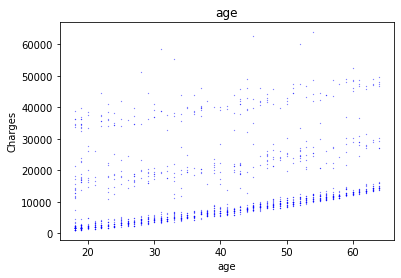

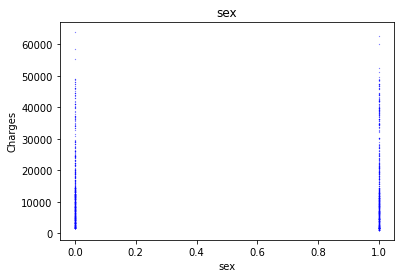

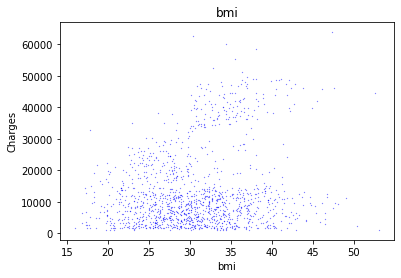

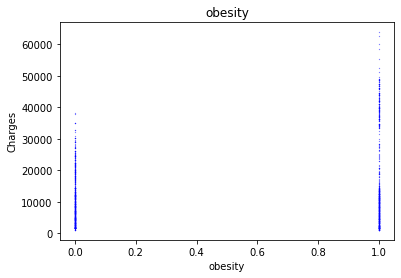

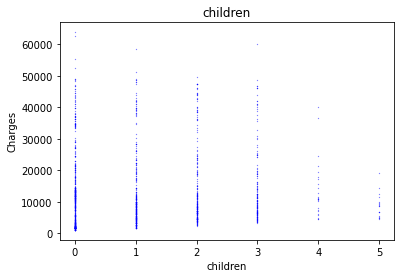

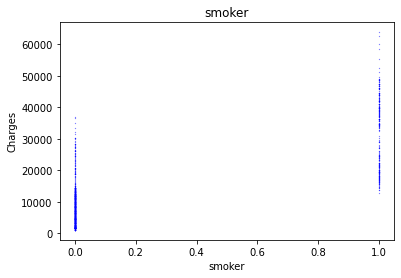

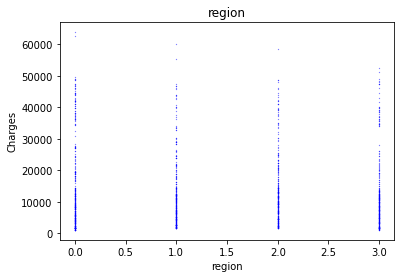

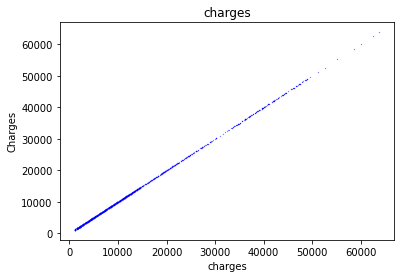

In [9]:
import matplotlib.pyplot as plt
n_features = 7
features = data1.columns
for feature in features:
  plt.plot(data1[feature], data1['charges'],'ob', markersize = 0.2)
  plt.xlabel(f'{feature}')
  plt.ylabel('Charges')
  plt.title(f'{feature}')
  plt.show()

From those plots I can say:
*   The number of children, sex and region do not affect the value of the charges. 

    1.   We can see that people that have 1, 2, 3 children pay 
have the same charges distribution. The 4 and 5 children distributions may seem different but according to the demographic data: the number of families with more than 3 children is much more lower. So the charges distribution may seem different for 4 and 5 (children), it's due to a lower number of records.

    2.   The male and female charges distributions are rather similar.

    3. All regions have similar distributions for the charges target. 

  We can conclude that the correlation between sex, children and regions, and the target is very low. Thats why I will  remove them fom the dataset later in this project.

* In the rest of the plots: Smoker, BMI, obesity and age; we can percieve correlations for them, there are asymmetries in the distributions. We may even see clusters (age and BMI). 
  1. The age is a variable influences continuously in the target, we may not want to convert it in a categorical data (young, old). Let's leave it like that.

  2. Maybe the BMI feature can be substituted by Obesity. From those graphs we can differenciate 4 clusters in the BMI plot: 2 clusters on the BMI < 30 side (non obese) and  2 clusters on the BMI > 30 (obese). 
  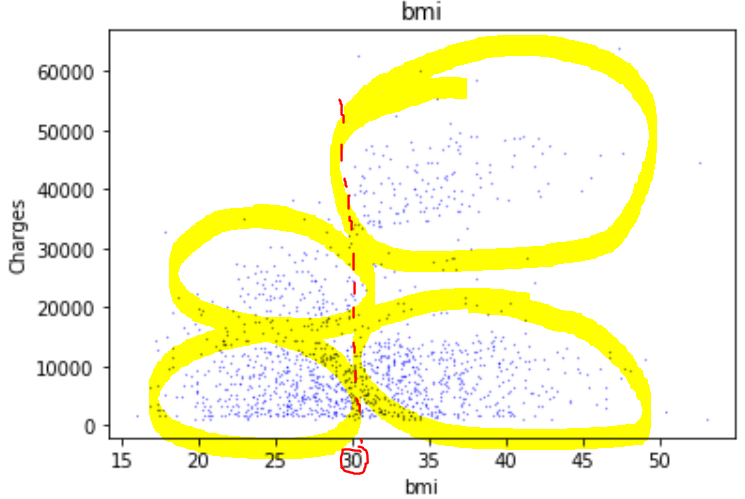
    
    If we watch carefully the Obesity plot, we can spot those same clusters projected in the two vertical lines (obese, not obese)

    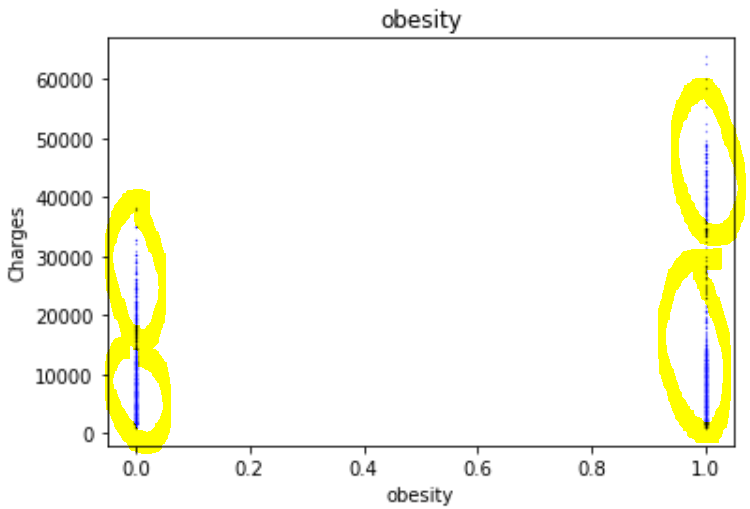

  3.The smoker plot let's us spot another four clusters.

My guess is that those clusters are directly related to the obesity and smoker featyres. So we have this four clusters:
  1. No Smoker and No Obese, let's call this cluster "Healthy".
  2. Smoker and No Obese, let's call this cluster "Fit Smoker".
  3. No Smoker and Obese, let's call this cluster "Fat No Smoker".
  4. Smoker and Obese, let's call this clustere "Fat Smoker".
 
 So, I will plot everything again but assigning different colors to those clusters. Let's see if the plots are a little bit more representative.






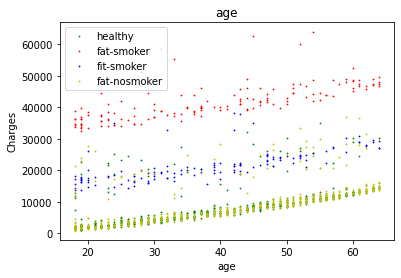

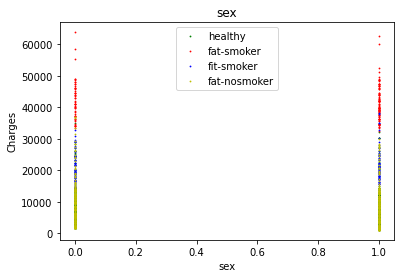

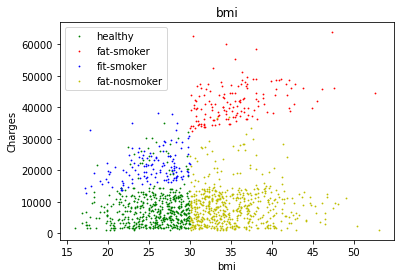

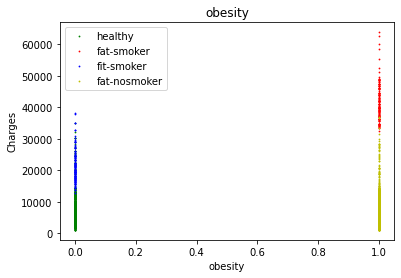

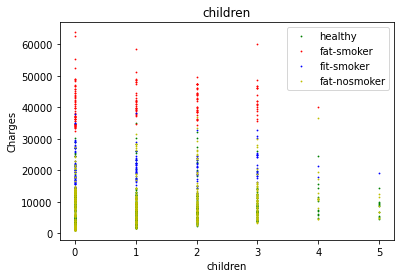

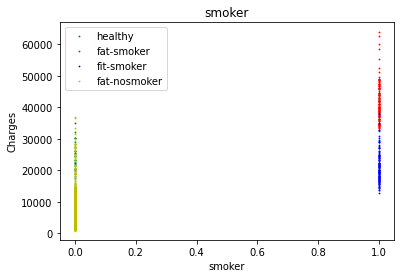

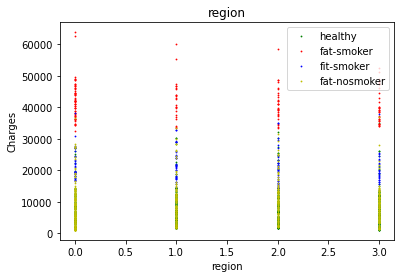

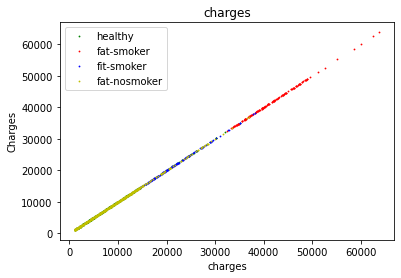

In [10]:
import matplotlib.pyplot as plt
features = data1.columns

healthy = []
fatsmoker = []
fitsmoker = []
fatnosmoker = []

for i in range(0, len(data1)):
  if (data1['smoker'][i] == 0 and data1['obesity'][i] == 0):
    healthy.append(True)
  else:
    healthy.append(False)
  if (data1['smoker'][i] == 1 and data1['obesity'][i] == 1):
    fatsmoker.append(True)
  else:
    fatsmoker.append(False)
  if (data1['smoker'][i] == 1 and data1['obesity'][i] == 0):
    fitsmoker.append(True)
  else:
    fitsmoker.append(False)
  if (data1['smoker'][i] == 0 and data1['obesity'][i] == 1):
    fatnosmoker.append(True)
  else:
    fatnosmoker.append(False)
  

for feature in features:
  plt.plot(data1[feature][healthy], data1['charges'][healthy],'og', markersize = 0.8, label = 'healthy')
  plt.plot(data1[feature][fatsmoker], data1['charges'][fatsmoker],'or', markersize = 0.8, label = 'fat-smoker')
  plt.plot(data1[feature][fitsmoker], data1['charges'][fitsmoker],'ob', markersize = 0.8, label = 'fit-smoker')
  plt.plot(data1[feature][fatnosmoker], data1['charges'][fatnosmoker],'oy', markersize = 0.8, label = 'fat-nosmoker')
  
  plt.xlabel(f'{feature}')
  plt.ylabel('Charges')
  plt.title(f'{feature}')
  plt.legend()
  plt.show()

Now these plots give us more insights about the distribution of the charges. I can confirm the hypothesis about the clusters that I explained after the first plot. I did not need to use KMeans or SOFM to calculate them, this time was easy. It was an simple deduction, but effective. I am going to create a new column in the dataset with the cluster information. 

In [11]:
import numpy as np

data1['class'] = np.zeros_like(healthy)
data1['class'][healthy] = 0
data1['class'][fatsmoker] = 1
data1['class'][fitsmoker] = 2
data1['class'][fatnosmoker] = 3
data1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,sex,bmi,obesity,children,smoker,region,charges,class
0,19,0,27.900,0,0,1,3,16884.92400,2.0
1,18,1,33.770,1,1,0,0,1725.55230,3.0
2,28,1,33.000,1,3,0,0,4449.46200,3.0
3,33,1,22.705,0,0,0,1,21984.47061,0.0
4,32,1,28.880,0,0,0,1,3866.85520,0.0


##Correlation score of the features.

Now I have to remove the non representative features. But before deleting those columns let's double check using the correlation metric. If one variable is categorical and the other one is continuous Point Biserial is the method to calculate the correlation coefficient.
If both are continuous correlation is calculation with the Pearson method.

Both Pearson and Point Biserial are values constrained between -1 and 1. If the value of the correlation coefficient is close to zero those two variables do not have a relation.

In [12]:
from scipy.stats import pointbiserialr

sex_corr = pointbiserialr(data1['sex'], data1['charges'])
bmi_corr = np.corrcoef(data1['bmi'], data1['charges'])
obesity_corr = pointbiserialr(data1['obesity'], data1['charges'])
smoker_corr = pointbiserialr(data1['smoker'], data1['charges'])
region_corr = pointbiserialr(data1['region'], data1['charges'])
children_corr = pointbiserialr(data1['children'], data1['charges'])
age_corr = pointbiserialr(data1['age'], data1['charges'])

print('Correlations between features and Charges:\n')
print(f'   Age - Charges :  {age_corr.correlation}')
print(f'   Sex - Charges :  {sex_corr.correlation}')
print(f'   BMI - Charges :  {bmi_corr[0,1]}')
print(f'   Obesity - Charges :  {obesity_corr.correlation}')
print(f'   Children - Charges :  {children_corr.correlation}')
print(f'   Smoker - Charges :  {smoker_corr.correlation}')
print(f'   Region - Charges :  {region_corr.correlation}')





Correlations between features and Charges:

   Age - Charges :  0.29900819333064765
   Sex - Charges :  0.05729206220202536
   BMI - Charges :  0.19834096883362876
   Obesity - Charges :  0.1996832219958824
   Children - Charges :  0.0679982268479048
   Smoker - Charges :  0.7872514304984773
   Region - Charges :  -0.05950036996227525


To see the importance of each feature a little bit better:

Importance % of each feature:

Age: 19.289933557417978%
Sex: 3.6960862541396144%
BMI: 12.795582849744118%
Obesity: 12.88217570871797%
Children: 4.3867736977623295%
Smoker: 50.7879988776928%
Region: -3.8385509454748292%


Importance % Bar Plot:



<BarContainer object of 7 artists>

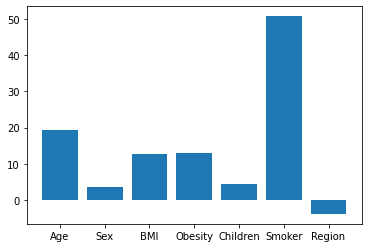

In [13]:
features = ['Age', 'Sex', 'BMI', 'Obesity', 'Children', 'Smoker', 'Region']
correlations = np.array([age_corr.correlation, sex_corr.correlation, bmi_corr[0,1], obesity_corr.correlation, children_corr.correlation, smoker_corr.correlation, region_corr.correlation])
importance = 100*correlations/np.sum(correlations) 

print('Importance % of each feature:\n')
for i in range(0, len(features)):
  print(f'{features[i]}: {importance[i]}%')
print('\n\nImportance % Bar Plot:\n')
plt.bar(features, importance)

We also can use tbis tool from Data Frame objects. And plot it with seaborn:

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance

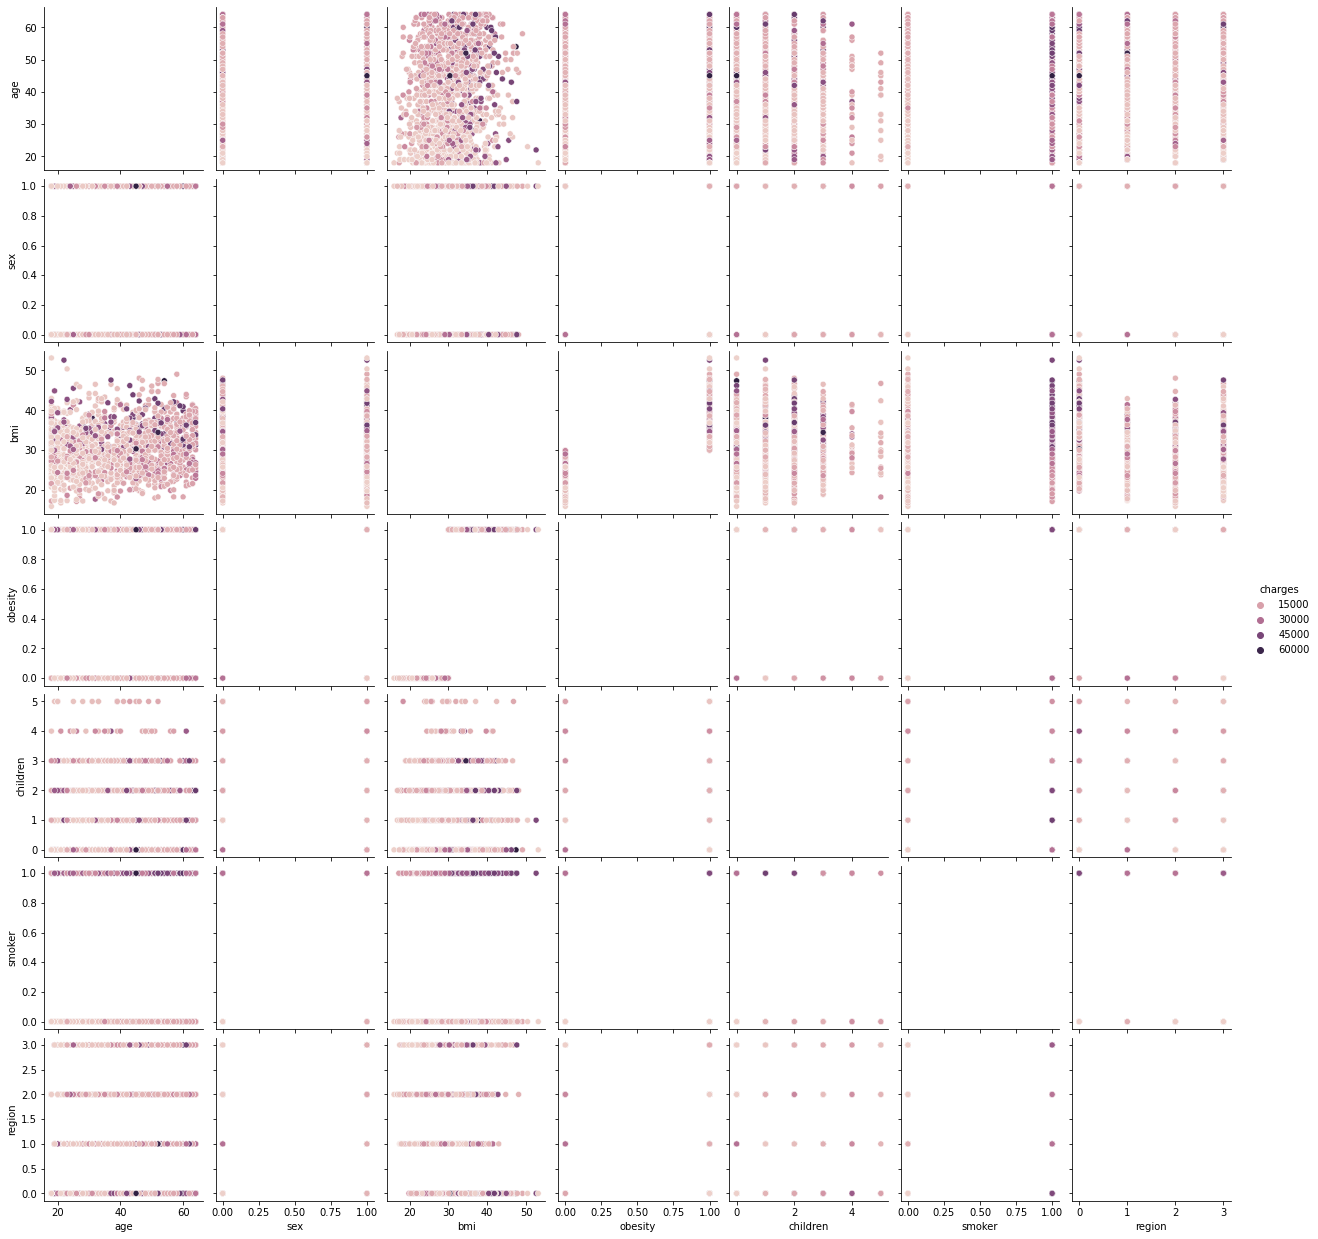

In [49]:
import seaborn as sns
sns.pairplot(data1[['age','sex','bmi','obesity', 'children', 'smoker', 'region', 'charges']],hue="charges")

So after doublechecking we conclude:
  1. Obesity and BMI contribute the same information, with the same clarity, so we can keep the obesity feature and drop BMI.
  2. We can drop these 3 fetarues: Sex, Children, Region.

##Final Dataset.

In [14]:
dataset = data1.loc[:,['age', 'obesity', 'smoker', 'class', 'charges']]
dataset.head()

,age,obesity,smoker,class,charges
0,19,0,1,2.0,16884.92400
1,18,1,0,3.0,1725.55230
2,28,1,0,3.0,4449.46200
3,33,0,0,0.0,21984.47061
4,32,0,0,0.0,3866.85520


##Scale the data.

First I am breaking apart the dataset into three numpy arrays: Features (Age, Obesity, Smoker), Target and Class (It will be valuable information to get a balanced split of the training and test data.

In [15]:
features = np.array(dataset.loc[:,['age', 'obesity', 'smoker']])
clusters = np.array(dataset['class'])
target = np.array(dataset['charges'])
print(f'Features: {features}\n')
print(f'Clusters: {clusters}\n')
print(f'Target: {target}\n')

Features: [[19 0 1.0]
 [18 1 0.0]
 [28 1 0.0]
 ...
 [18 1 0.0]
 [21 0 0.0]
 [61 0 1.0]]

Clusters: [2. 3. 3. ... 3. 0. 2.]

Target: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]



In [16]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

feature_scaler.fit(features)
target_scaler.fit(target.reshape(-1,1))

features_sc = feature_scaler.transform(features)
target_sc = target_scaler.transform(target.reshape(-1,1))

print(f'Features Scaled: {features_sc}\n')
print(f'Target Scaled: {target_sc}\n')

Features Scaled: [[-1.43876426 -1.05534074  1.97058663]
 [-1.50996545  0.94756126 -0.5074631 ]
 [-0.79795355  0.94756126 -0.5074631 ]
 ...
 [-1.50996545  0.94756126 -0.5074631 ]
 [-1.29636188 -1.05534074 -0.5074631 ]
 [ 1.55168573 -1.05534074  1.97058663]]

Target Scaled: [[ 0.2985838 ]
 [-0.95368917]
 [-0.72867467]
 ...
 [-0.96159623]
 [-0.93036151]
 [ 1.31105347]]



#3. Train and Test Split.


I split the scaled features and target into train and test sets. I want to train the model with a balanced train dataset. Thus, I use clusters variable (Healthy, Fat Smoker, Fit Smoker, Fat No Smoker) to stratify the split. I also want to be able to compare later the results of the difference performance of a model between the different clusters.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_sc, target_sc, test_size = 0.25, random_state =42, stratify =clusters)

healthy_test = []
fatsmoker_test = []
fitsmoker_test = []
fatnosmoker_test = []
n_healthy_test = 0
n_fatsmoker_test = 0
n_fitsmoker_test = 0
n_fatnosmoker_test = 0

X_test_no_scaled = feature_scaler.inverse_transform(X_test)
X_test_no_scaled = np.rint(X_test_no_scaled)
X_test_no_scaled = X_test_no_scaled.astype('int32')

for i in X_test_no_scaled:
  if (i[1] == 0 and i[2] == 0):
    healthy_test.append(True)
    n_healthy_test += 1
  else:
    healthy_test.append(False)
  if (i[1] == 1 and i[2] == 1):
    fatsmoker_test.append(True)
    n_fatsmoker_test += 1
  else:
    fatsmoker_test.append(False)
  if (i[1] == 0 and i[2] == 1):
    fitsmoker_test.append(True)
    n_fitsmoker_test += 1
  else:
    fitsmoker_test.append(False)
  if (i[1] == 1 and i[2] == 0):
    fatnosmoker_test.append(True)
    n_fatnosmoker_test += 1
  else:
    fatnosmoker_test.append(False)

healthy_test = np.array(healthy_test)
fatsmoker_test = np.array(fatsmoker_test)
fitsmoker_test = np.array(fitsmoker_test)
fatnosmoker_test = np.array(fatnosmoker_test)


X_train_no_scaled = feature_scaler.inverse_transform(X_train)
X_train_no_scaled = np.rint(X_train_no_scaled)
X_train_no_scaled = X_train_no_scaled.astype('int32')

healthy_train = []
fatsmoker_train = []
fitsmoker_train = []
fatnosmoker_train = []
n_healthy_train = 0
n_fatsmoker_train = 0
n_fitsmoker_train = 0
n_fatnosmoker_train = 0

for i in X_train_no_scaled:
  if (i[1] == 0 and i[2] == 0):
    healthy_train.append(True)
    n_healthy_train += 1
  else:
    healthy_train.append(False)
  if (i[1] == 1 and i[2] == 1):
    fatsmoker_train.append(True)
    n_fatsmoker_train += 1
  else:
    fatsmoker_train.append(False)
  if (i[1] == 0 and i[2] == 1):
    fitsmoker_train.append(True)
    n_fitsmoker_train += 1
  else:
    fitsmoker_train.append(False)
  if (i[1] == 1 and i[2] == 0):
    fatnosmoker_train.append(True)
    n_fatnosmoker_train += 1
  else:
    fatnosmoker_train.append(False)

healthy_train = np.array(healthy_train)
fatsmoker_train = np.array(fatsmoker_train)
fitsmoker_train = np.array(fitsmoker_train)
fatnosmoker_train = np.array(fatnosmoker_train)



In [18]:
print(f'n_healthy_train: {n_healthy_train}')
print(f'n_fatsmoker_train: {n_fatsmoker_train}')
print(f'n_fitsmoker_train: {n_fitsmoker_train}')
print(f'n_fatnosmoker_train: {n_fatnosmoker_train}\n')

print(f'n_healthy_test: {n_healthy_test}')
print(f'n_fatsmoker_test: {n_fatsmoker_test}')
print(f'n_fitsmoker_test: {n_fitsmoker_test}')
print(f'n_fatnosmoker_test: {n_fatnosmoker_test}')


n_healthy_train: 377
n_fatsmoker_train: 108
n_fitsmoker_train: 97
n_fatnosmoker_train: 421

n_healthy_test: 126
n_fatsmoker_test: 36
n_fitsmoker_test: 33
n_fatnosmoker_test: 140


# 4. Regression Model and Results.

## a. Linear Regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test)
y_pred_notscaled = target_scaler.inverse_transform(y_pred)

print(f'RMSE:{math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))}')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')


RMSE:5712.073804957379
R2_score:0.7641303780752075


##b. Random Forest.

In [20]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100,
                            max_depth = 30,
                            n_jobs = -1,
                            random_state = 42)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test)
y_pred_notscaled = target_scaler.inverse_transform(y_pred)

print(f'RMSE:{math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))}')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RMSE:4521.650580787937
R2_score:0.8521986546805408


##c. KNeighbors (Regressor).

In [21]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors = 15,
                          n_jobs = -1,
                          weights = 'uniform',
                          algorithm = 'auto')
KNR.fit(X_train, y_train)
y_pred = KNR.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test)
y_pred_notscaled = target_scaler.inverse_transform(y_pred)

print(f'RMSE:{math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))}')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')


RMSE:4176.695272518314
R2_score:0.8738898704449585


##d. Multi-Layer Perceptron.

In [43]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=(10,10),
                   activation = 'relu',
                   learning_rate_init=0.001,
                   batch_size = 256,
                   max_iter = 1000,
                   early_stopping = True,
                   n_iter_no_change = 50,
                   random_state = 42)
         
MLP.fit(X_train, y_train.reshape(len(y_train),))
y_pred = MLP.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test).reshape(len(y_test),)
y_pred_notscaled = target_scaler.inverse_transform(y_pred).reshape(len(y_test),)

RMSE = math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))
print('General Results:')
print(f'   RMSE: {RMSE}\n')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')

General Results:
   RMSE: 4150.511464509105

R2_score:0.8754660893973922


I want to see how the model performs for each class defined previously (Healthy, fat smoker, fit smoker, fat no smoker).

In [23]:
y_test_healthy, y_pred_healthy = y_test_notscaled*healthy_test, y_pred_notscaled*healthy_test
y_test_fatsmoker, y_pred_fatsmoker = y_test_notscaled*fatsmoker_test, y_pred_notscaled*fatsmoker_test
y_test_fitsmoker, y_pred_fitsmoker = y_test_notscaled*fitsmoker_test, y_pred_notscaled*fitsmoker_test
y_test_fatnosmoker, y_pred_fatnosmoker = y_test_notscaled*fatnosmoker_test, y_pred_notscaled*fatnosmoker_test

rmse_healthy = math.sqrt(mean_squared_error(y_test_healthy, y_pred_healthy))
rmse_fatsmoker =  math.sqrt(mean_squared_error(y_test_fatsmoker, y_pred_fatsmoker))
rmse_fitsmoker =  math.sqrt(mean_squared_error(y_test_fitsmoker, y_pred_fitsmoker))
rmse_fatnosmoker =  math.sqrt(mean_squared_error(y_test_fatnosmoker, y_pred_fatnosmoker))

from scipy.stats import describe

print('General Results:')
print(f'   RMSE: {RMSE}\n')

print('Healthy Results:')
print(f'   rmse_healthy: {rmse_healthy}\n')

print('Fat Smoker Results:')
print(f'   rmse_fatsmoker: {rmse_fatsmoker}\n')

print('Fit Smoker Results:')
print(f'   rmse_fitsmoker: {rmse_fitsmoker}\n')

print('Fat no Smoker Results:')
print(f'   rmse_fatnosmoker: {rmse_fatnosmoker}\n')

General Results:
   RMSE: 4095.417142313547

Healthy Results:
   rmse_healthy: 2690.889459140279

Fat Smoker Results:
   rmse_fatsmoker: 791.6235551990532

Fit Smoker Results:
   rmse_fitsmoker: 748.5788006856919

Fat no Smoker Results:
   rmse_fatnosmoker: 2888.6878360704504



As we can see, the model performance is much better the smokers. I really don't understand this, because in the training data the less frequent class are those two. I would see understandable if the model performed worse with those, but it is the opposite.

## e. SOM + Linear Regression.

In [24]:
!pip install minisom
from minisom import MiniSom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp37-none-any.whl size=8609 sha256=aab5bf84bd8a902a38ec3514673905c11ada5767d7bb440f0700a438db3d95b5
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [25]:
SOM = MiniSom(8,8,3,sigma=0.4, learning_rate=0.2)
SOM.train(X_train,5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.09858714781633056


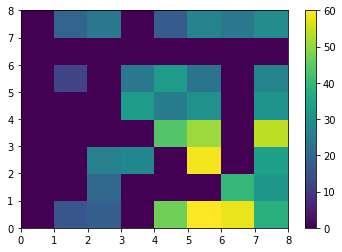

In [26]:
activation = SOM.activation_response(X_train)
X_train_qnt=SOM.quantization(X_train)

plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [27]:
LR_Layer2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

LR_Layer2.fit(X_train_qnt, y_train)

X_test_qnt = SOM.quantization(X_test)
y_pred = LR_Layer2.predict(X_test_qnt)

y_test_notscaled = target_scaler.inverse_transform(y_test)
y_pred_notscaled = target_scaler.inverse_transform(y_pred)

print(f'RMSE:{math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))}')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')


RMSE:5773.934681293522
R2_score:0.7589938508869348


## f. Elastic Net.

In [28]:
from sklearn.linear_model import ElasticNet

MLP = ElasticNet()
         
MLP.fit(X_train, y_train.reshape(len(y_train),))
y_pred = MLP.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test).reshape(len(y_test),)
y_pred_notscaled = target_scaler.inverse_transform(y_pred).reshape(len(y_test),)

RMSE = math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))
print('General Results:')
print(f'   RMSE: {RMSE}\n')

General Results:
   RMSE: 9988.417436149397



##g. Lasso.

In [29]:
from sklearn.linear_model import Lasso

MLP = Lasso()
         
MLP.fit(X_train, y_train.reshape(len(y_train),))
y_pred = MLP.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test).reshape(len(y_test),)
y_pred_notscaled = target_scaler.inverse_transform(y_pred).reshape(len(y_test),)

RMSE = math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))
print('General Results:')
print(f'   RMSE: {RMSE}\n')



General Results:
   RMSE: 11762.878380002838



##h. SVR.

In [30]:
from sklearn.svm import SVR

MLP = SVR()
         
MLP.fit(X_train, y_train.reshape(len(y_train),))
y_pred = MLP.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test).reshape(len(y_test),)
y_pred_notscaled = target_scaler.inverse_transform(y_pred).reshape(len(y_test),)

RMSE = math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))
print('General Results:')
print(f'   RMSE: {RMSE}\n')


General Results:
   RMSE: 4143.621400142173



#What if I use all the features originally included in the dataset?

I want to see how the predictions perform if I don't delete any of the original features of the dataset. Just to compare the results with the ones obtained after simplifying the dataset after the preprocessing.

This is the original dataset:

In [31]:
data1.head()

,age,sex,bmi,obesity,children,smoker,region,charges,class
0,19,0,27.900,0,0,1,3,16884.92400,2.0
1,18,1,33.770,1,1,0,0,1725.55230,3.0
2,28,1,33.000,1,3,0,0,4449.46200,3.0
3,33,1,22.705,0,0,0,1,21984.47061,0.0
4,32,1,28.880,0,0,0,1,3866.85520,0.0


In [33]:
all_features = data1.iloc[:, :-2]
all_features.head()

,age,sex,bmi,obesity,children,smoker,region
0,19,0,27.900,0,0,1,3
1,18,1,33.770,1,1,0,0
2,28,1,33.000,1,3,0,0
3,33,1,22.705,0,0,0,1
4,32,1,28.880,0,0,0,1


In [34]:
target = data1.iloc[:, -2]
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

First I scale the data and split it into Training data and Testing data.

In [40]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

feature_scaler.fit(np.array(all_features))
target_scaler.fit(np.array(target).reshape(-1,1))

all_features_sc = feature_scaler.transform(all_features)
target_sc = target_scaler.transform(np.array(target).reshape(-1,1))

print(f'Features Scaled: {features_sc}\n')
print(f'Target Scaled: {target_sc}\n')

Features Scaled: [[-1.43876426 -1.05534074  1.97058663]
 [-1.50996545  0.94756126 -0.5074631 ]
 [-0.79795355  0.94756126 -0.5074631 ]
 ...
 [-1.50996545  0.94756126 -0.5074631 ]
 [-1.29636188 -1.05534074 -0.5074631 ]
 [ 1.55168573 -1.05534074  1.97058663]]

Target Scaled: [[ 0.2985838 ]
 [-0.95368917]
 [-0.72867467]
 ...
 [-0.96159623]
 [-0.93036151]
 [ 1.31105347]]



In [41]:
X_train, X_test, y_train, y_test = train_test_split(all_features_sc, target_sc, test_size = 0.25, random_state =42, stratify =clusters)

## Prediction and results.

I will use the model that achieved best performance before, MLP Regressor

In [44]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=(10,10),
                   activation = 'relu',
                   learning_rate_init=0.001,
                   batch_size = 256,
                   max_iter = 1000,
                   early_stopping = True,
                   n_iter_no_change = 50,
                   random_state = 42)
         
MLP.fit(X_train, y_train.reshape(len(y_train),))
y_pred = MLP.predict(X_test)

y_test_notscaled = target_scaler.inverse_transform(y_test).reshape(len(y_test),)
y_pred_notscaled = target_scaler.inverse_transform(y_pred).reshape(len(y_test),)

RMSE = math.sqrt(mean_squared_error(y_test_notscaled, y_pred_notscaled))
print('General Results:')
print(f'   RMSE: {RMSE}\n')
print(f'R2_score:{r2_score(y_test_notscaled, y_pred_notscaled)}')

General Results:
   RMSE: 4150.511464509105

R2_score:0.8754660893973922


##Conclusions.

As we can compare the results of this prediction (using all the original features) are similar to the ones obtained simplifying the dataset. This means that I did a good preprocessing work and simplifying the dataset, and I used the most meaningful information.